## Installation

### Clone the repository

In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


In [7]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.1 MB/s eta 0:00:00


In [8]:
from datasets import load_dataset

ds = load_dataset("krishan23/indian_english")

README.md:   0%|          | 0.00/399 [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/345M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/349M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/385M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/371M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/545M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6765 [00:00<?, ? examples/s]

In [9]:
test_data = ds.remove_columns(
    ["id", "speaker_id"]
)

In [12]:
test_data

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 6765
    })
})

In [40]:
# Take a few samples from your test dataset
# Assuming you want to take samples from the 'train' split
small_test_data = test_data["train"].take(5)

In [41]:
from transformers import pipeline, AutoProcessor, AutoModelForSpeechSeq2Seq

# Fine-tuned
ft_processor = AutoProcessor.from_pretrained("hamna11/whisper-tiny-en-asian-accent")
ft_model = AutoModelForSpeechSeq2Seq.from_pretrained("hamna11/whisper-tiny-en-asian-accent")

# Baseline
base_processor = AutoProcessor.from_pretrained("openai/whisper-tiny")
base_model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-tiny")

# Pipelines
ft_pipe = pipeline("automatic-speech-recognition", model=ft_model, tokenizer=ft_processor.tokenizer, feature_extractor=ft_processor.feature_extractor)
base_pipe = pipeline("automatic-speech-recognition", model=base_model, tokenizer=base_processor.tokenizer, feature_extractor=base_processor.feature_extractor)


Device set to use cpu
Device set to use cpu


In [42]:
import evaluate
wer_metric = evaluate.load("wer")

def evaluate(pipe, dataset):
    predictions, references = [], []

    for item in dataset:
        audio_input = item["audio"]["array"]
        reference = item["transcription"].lower().strip()

        pred = pipe(audio_input)["text"].lower().strip()

        predictions.append(pred)
        references.append(reference)

    wer = wer_metric.compute(predictions=predictions, references=references)
    return wer, predictions, references


In [43]:
from transformers import pipeline, AutoProcessor, AutoModelForSpeechSeq2Seq

# Fine-tuned
ft_processor = AutoProcessor.from_pretrained("hamna11/whisper-tiny-en-asian-accent")
ft_model = AutoModelForSpeechSeq2Seq.from_pretrained("hamna11/whisper-tiny-en-asian-accent")

# Baseline
base_processor = AutoProcessor.from_pretrained("openai/whisper-tiny")
base_model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-tiny")

# Pipelines
ft_pipe = pipeline("automatic-speech-recognition", model=ft_model, tokenizer=ft_processor.tokenizer, feature_extractor=ft_processor.feature_extractor, return_timestamps=True) # Added return_timestamps=True
base_pipe = pipeline("automatic-speech-recognition", model=base_model, tokenizer=base_processor.tokenizer, feature_extractor=base_processor.feature_extractor, return_timestamps=True) # Added return_timestamps=True

Device set to use cpu
Device set to use cpu


In [44]:
ft_wer, ft_preds, refs = evaluate(ft_pipe, small_test_data)
base_wer, base_preds, _ = evaluate(base_pipe, small_test_data)

print(f"Fine-tuned Whisper WER: {ft_wer:.2f}")
print(f"Baseline Whisper WER: {base_wer:.2f}")

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can h

Fine-tuned Whisper WER: 0.98
Baseline Whisper WER: 6.70


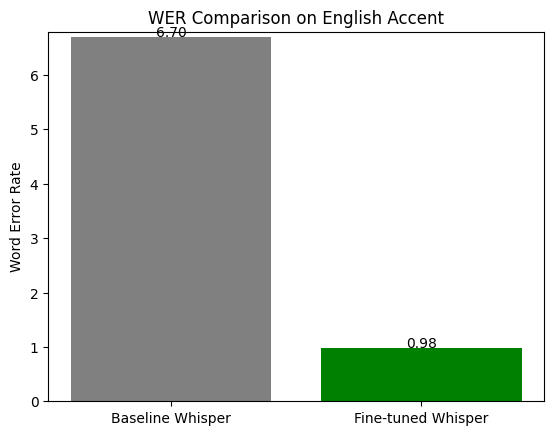

In [46]:
import matplotlib.pyplot as plt

labels = ['Baseline Whisper', 'Fine-tuned Whisper']
values = [base_wer, ft_wer]

plt.bar(labels, values, color=["gray", "green"])
plt.ylabel("Word Error Rate")
plt.title("WER Comparison on English Accent")
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.ylim(0, max(values)+0.1)
plt.show()


In [5]:
from transformers import pipeline, AutoProcessor, AutoModelForSpeechSeq2Seq

# Fine-tuned model
ft_processor = AutoProcessor.from_pretrained("hamna11/whisper-tiny-en-asian-accent")
ft_model = AutoModelForSpeechSeq2Seq.from_pretrained("hamna11/whisper-tiny-en-asian-accent")

# Baseline Whisper model
base_processor = AutoProcessor.from_pretrained("openai/whisper-tiny")
base_model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-tiny")

# Pipelines
ft_pipe = pipeline("automatic-speech-recognition", model=ft_model, tokenizer=ft_processor.tokenizer, feature_extractor=ft_processor.feature_extractor)
base_pipe = pipeline("automatic-speech-recognition", model=base_model, tokenizer=base_processor.tokenizer, feature_extractor=base_processor.feature_extractor)


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

Device set to use cpu
Device set to use cpu


In [17]:
!pip install jiwer evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.0 MB/s eta 0:00:00


In [18]:
import torchaudio
import evaluate

wer_metric = evaluate.load("wer")

def evaluate_model(pipe, test_data):
    predictions = []
    references = []

    for sample in test_data:
        pred = pipe(sample["audio_path"])["text"].lower().strip()
        ref = sample["reference"].lower().strip()

        predictions.append(pred)
        references.append(ref)

    wer = wer_metric.compute(predictions=predictions, references=references)
    return wer, predictions


In [20]:
import torchaudio
import evaluate

wer_metric = evaluate.load("wer")

def evaluate_model(pipe, test_data):
    predictions = []
    references = []

    for sample in test_data:
        # Assuming pipe returns a string if given a string as input
        # Try to get the text directly, or handle the case where it's a dict
        try:
            pred = pipe(sample["audio_path"]).lower().strip()
        except AttributeError:
            pred = pipe(sample["audio_path"])["text"].lower().strip()
        ref = sample["reference"].lower().strip()

        predictions.append(pred)
        references.append(ref)

    wer = wer_metric.compute(predictions=predictions, references=references)
    return wer, predictions

In [21]:
import torch
import gradio as gr
import torchaudio
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq, pipeline

# Load model and processor
processor = AutoProcessor.from_pretrained("hamna11/whisper-tiny-en-asian-accent")
model = AutoModelForSpeechSeq2Seq.from_pretrained("hamna11/whisper-tiny-en-asian-accent")
model.eval()

# Use pipeline for easier integration
pipe = pipeline("automatic-speech-recognition", model=model, tokenizer=processor.tokenizer, feature_extractor=processor.feature_extractor)

# Inference function
def transcribe(audio):
    text = pipe(audio)["text"]
    return text

# Gradio UI
gr.Interface(
    fn=transcribe,
    inputs=gr.Audio( type="filepath"),
    outputs="text",
    title="Asian Accent Whisper STT"
).launch()


Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://25a1ac1b4a0ae31aad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
